In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# !------------ 1 - Data Loading and Preperation -----------!

In [3]:
# Open and read the file
with open('D:/Data Science/Fiverr_Materials_Projects/Haaz_SaudiArabia/Order-2/Dataset-4_CTU13/CTU-13-Dataset/7/capture20110816-2.binetflow', 'r') as file:
    for line in file:
        print(line.strip())  # Use strip() to remove any leading/trailing whitespace or newlines


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [4]:
# Read and print the first few lines of the file for inspection
with open('D:/Data Science/Fiverr_Materials_Projects/Haaz_SaudiArabia/Order-2/Dataset-4_CTU13/CTU-13-Dataset/1/capture20110810.binetflow', 'r') as f:
    for _ in range(5):  # Adjust the number of lines as needed
        print(f.readline().strip())


StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
2011/08/10 09:46:59.607825,1.026539,tcp,94.44.127.113,1577,   ->,147.32.84.59,6881,S_RA,0,0,4,276,156,flow=Background-Established-cmpgw-CVUT
2011/08/10 09:47:00.634364,1.009595,tcp,94.44.127.113,1577,   ->,147.32.84.59,6881,S_RA,0,0,4,276,156,flow=Background-Established-cmpgw-CVUT
2011/08/10 09:47:48.185538,3.056586,tcp,147.32.86.89,4768,   ->,77.75.73.33,80,SR_A,0,0,3,182,122,flow=Background-TCP-Attempt
2011/08/10 09:47:48.230897,3.111769,tcp,147.32.86.89,4788,   ->,77.75.73.33,80,SR_A,0,0,3,182,122,flow=Background-TCP-Attempt


In [7]:
import os
import pandas as pd


# Define the main directory containing your folders
main_directory = 'D:/Data Science/Fiverr_Materials_Projects/Haaz_SaudiArabia/Order-2/Dataset-4_CTU13/CTU-13-Dataset'


# Initialize a list to store DataFrames for each NetFlow file
all_flows = []


# Loop through each folder in the main directory
for folder in os.listdir(main_directory):
    folder_path = os.path.join(main_directory, folder)
    print(f"Checking folder: {folder_path}")  # Debug statement
    if os.path.isdir(folder_path):  # Check if it's a directory
        for file in os.listdir(folder_path):
            print(f"Found file: {file}")  # Debug statement
            if file.endswith('.binetflow'):  # Check for binetflow files
                file_path = os.path.join(folder_path, file)
                print(f"Loading file: {file_path}")  # Debug statement
                # Load the binetflow file into a DataFrame
                df = pd.read_csv(file_path, 
                                 sep=',', 
                                 header=1,  # Set header to the second row (actual header)
                                 names=[
                                     'StartTime', 'Dur', 'Protocol', 'SrcAddr', 'Sport', 
                                     'Dir', 'DstAddr', 'Dport', 'State', 'sTos', 'dTos', 
                                     'TotPkts', 'TotBytes', 'SrcBytes', 'Label'
                                 ])
                # Check if DataFrame is not empty before appending
                if not df.empty:
                    all_flows.append(df)
                else:
                    print(f"DataFrame is empty for file: {file_path}")  # Debug statement

# Check if any DataFrames were loaded
if all_flows:  # Check if the list is not empty
    combined_flows = pd.concat(all_flows, ignore_index=True)
    print(combined_flows.head())
else:
    print("No flows were loaded. Please check the input files.")


Checking folder: D:/Data Science/Fiverr_Materials_Projects/Haaz_SaudiArabia/Order-2/Dataset-4_CTU13/CTU-13-Dataset\1
Found file: botnet-capture-20110810-neris.pcap
Found file: capture20110810.binetflow
Loading file: D:/Data Science/Fiverr_Materials_Projects/Haaz_SaudiArabia/Order-2/Dataset-4_CTU13/CTU-13-Dataset\1\capture20110810.binetflow
Found file: README.html
Checking folder: D:/Data Science/Fiverr_Materials_Projects/Haaz_SaudiArabia/Order-2/Dataset-4_CTU13/CTU-13-Dataset\10
Found file: botnet-capture-20110818-bot.pcap
Found file: capture20110818.binetflow
Loading file: D:/Data Science/Fiverr_Materials_Projects/Haaz_SaudiArabia/Order-2/Dataset-4_CTU13/CTU-13-Dataset\10\capture20110818.binetflow
Found file: README
Checking folder: D:/Data Science/Fiverr_Materials_Projects/Haaz_SaudiArabia/Order-2/Dataset-4_CTU13/CTU-13-Dataset\11
Found file: botnet-capture-20110818-bot-2.pcap
Found file: capture20110818-2.binetflow
Loading file: D:/Data Science/Fiverr_Materials_Projects/Haaz_SaudiAr

In [8]:
print(combined_flows.Label.value_counts())

Label
flow=To-Background-UDP-CVUT-DNS-Server                      8118983
flow=Background-UDP-Established                             5614554
flow=Background-TCP-Established                             2265100
flow=Background-Established-cmpgw-CVUT                       861785
flow=Background-TCP-Attempt                                  726370
                                                             ...   
flow=From-Botnet-V43-TCP-Established-HTTP-To-Microsoft-2          1
flow=From-Botnet-V50-4-TCP-HTTP-Google-Net-Established-7          1
flow=From-Botnet-V50-5-TCP-Established-HTTP-Ad-64                 1
flow=From-Botnet-V43-TCP-Established-HTTP-Ad-49                   1
flow=From-Botnet-V50-3-TCP-Established-HTTP-Ad-4                  1
Name: count, Length: 1400, dtype: int64


In [9]:
combined_flows.Protocol.value_counts()

Protocol
udp          15023222
tcp           4380617
icmp           496352
igmp            38709
rtp             13914
rtcp            11510
arp             10545
ipv6-icmp        1120
ipx/spx           267
pim               140
ipv6              127
udt                65
esp                47
rarp               19
unas               16
llc                 7
rsvp                7
gre                 2
ipnip               1
Name: count, dtype: int64

In [10]:
print(combined_flows.info())  # Print DataFrame structure
print(combined_flows.head(10))  # Print the first 10 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19976687 entries, 0 to 19976686
Data columns (total 15 columns):
 #   Column     Dtype  
---  ------     -----  
 0   StartTime  object 
 1   Dur        float64
 2   Protocol   object 
 3   SrcAddr    object 
 4   Sport      object 
 5   Dir        object 
 6   DstAddr    object 
 7   Dport      object 
 8   State      object 
 9   sTos       float64
 10  dTos       float64
 11  TotPkts    int64  
 12  TotBytes   int64  
 13  SrcBytes   int64  
 14  Label      object 
dtypes: float64(3), int64(3), object(9)
memory usage: 2.2+ GB
None
                    StartTime         Dur Protocol          SrcAddr  Sport  \
0  2011/08/10 09:47:00.634364    1.009595      tcp    94.44.127.113   1577   
1  2011/08/10 09:47:48.185538    3.056586      tcp     147.32.86.89   4768   
2  2011/08/10 09:47:48.230897    3.111769      tcp     147.32.86.89   4788   
3  2011/08/10 09:47:48.963351    3.083411      tcp     147.32.86.89   4850   
4  2011/08/10 09:47:

In [11]:
labels = combined_flows.Label.value_counts()

for i in range(len(labels)):
    print(labels.index[i])
    print(labels[i])
    

flow=To-Background-UDP-CVUT-DNS-Server
8118983
flow=Background-UDP-Established
5614554
flow=Background-TCP-Established
2265100
flow=Background-Established-cmpgw-CVUT
861785
flow=Background-TCP-Attempt
726370
flow=Background-UDP-Attempt
660250
flow=Background
452447
flow=To-Background-CVUT-Proxy
151298
flow=Background-Attempt-cmpgw-CVUT
120388
flow=From-Normal-V44-Stribrek
108807
flow=To-Background-CVUT-WebServer
51039
flow=From-Normal-V49-Stribrek
48588
flow=Background-UDP-NTP-Established-1
46262
flow=From-Normal-V54-Stribrek
26846
flow=From-Botnet-V44-TCP-Attempt
26234
flow=From-Botnet-V42-UDP-DNS
26140
flow=From-Botnet-V54-TCP-Attempt
22463
flow=From-Normal-V42-Stribrek
18438
flow=From-Normal-V49-Grill
18164
flow=To-Background-MatLab-Server
17178
flow=From-Normal-V50-Stribrek
15806
flow=From-Botnet-V50-1-UDP-DNS
15115
flow=From-Botnet-V51-2-ICMP
14414
flow=From-Botnet-V51-1-ICMP
13697
flow=From-Botnet-V50-7-UDP-DNS
12588
flow=From-Normal-V45-Stribrek
12133
flow=From-Botnet-V51-6-ICMP

C:\Users\pc\AppData\Local\Temp\ipykernel_24124\991821596.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(labels[i])


# Selecting only two labels from the labels column

In [12]:
labels_to_keep = ['flow=From-Normal-V44-Stribrek', 'flow=From-Botnet-V44-TCP-Attempt']

In [13]:
# Filter the DataFrame to keep only the specified labels
filtered_df = combined_flows[combined_flows['Label'].isin(labels_to_keep)]

print(filtered_df)

                           StartTime       Dur Protocol        SrcAddr  Sport  \
8300598   2011/08/12 15:24:03.251544  0.000396      udp  147.32.84.170  43074   
8300599   2011/08/12 15:24:03.252392  0.000486      udp  147.32.84.170  51423   
8300600   2011/08/12 15:24:03.253612  0.017916      tcp  147.32.84.170  55222   
8301040   2011/08/12 15:24:13.252581  0.000502      udp  147.32.84.170  57756   
8301041   2011/08/12 15:24:13.253646  0.000302      udp  147.32.84.170  48640   
...                              ...       ...      ...            ...    ...   
13010334  2011/08/15 10:13:14.694638  0.000318      udp  147.32.84.170  38118   
13010335  2011/08/15 10:13:14.695880  0.228144      tcp  147.32.84.170  57152   
13010935  2011/08/15 10:13:23.979570  0.000400      udp  147.32.84.170  60186   
13010936  2011/08/15 10:13:23.980355  0.000287      udp  147.32.84.170  53954   
13010937  2011/08/15 10:13:23.981151  0.018054      tcp  147.32.84.170  60917   

            Dir         Dst

In [14]:
filtered_df.Label.value_counts()

Label
flow=From-Normal-V44-Stribrek       108807
flow=From-Botnet-V44-TCP-Attempt     26234
Name: count, dtype: int64

# Changing label names to make them easy to access

In [15]:
# Create a new column and apply transformations
def transform_label(label):
    if 'Botnet' in label:
        return 'botnet'
    elif 'Normal' in label:
        return 'normal'
    else:
        return label  # In case there are other labels, keep them as is


# Apply the transformation and create a new column called 'new_label'
filtered_df['new_label'] = filtered_df['Label'].apply(transform_label)


# Check the updated DataFrame
print(filtered_df['new_label'])

8300598     normal
8300599     normal
8300600     normal
8301040     normal
8301041     normal
             ...  
13010334    normal
13010335    normal
13010935    normal
13010936    normal
13010937    normal
Name: new_label, Length: 135041, dtype: object


C:\Users\pc\AppData\Local\Temp\ipykernel_24124\2142727622.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['new_label'] = filtered_df['Label'].apply(transform_label)


In [16]:
filtered_df.new_label.value_counts()

new_label
normal    108807
botnet     26234
Name: count, dtype: int64

# !------------- 2. EDA - Exploratory Data Analysis ---------------------!
"""

In EDA we have first checked the length and shape of the dataset and we have found that the dataset have 16898 records with 22 columns in the original dataframe. 

But after doing data preperation, we have 24 columns.

After checking length and the columns we have checked the statistics of the data data and the corellation between each columns, and the results are shown below. 

After that we have checked the data-type of each columns to check categorical and numerical columns which will be helpfull in our Data Pre-processing step.  

"""

In [31]:
filtered_df.head()

,StartTime,Dur,Protocol,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,new_label
8300598,2011/08/12 15:24:03.251544,0.000396,udp,147.32.84.170,43074,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Normal-V44-Stribrek,normal
8300599,2011/08/12 15:24:03.252392,0.000486,udp,147.32.84.170,51423,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Normal-V44-Stribrek,normal
8300600,2011/08/12 15:24:03.253612,0.017916,tcp,147.32.84.170,55222,->,209.85.148.103,80,FSA_FSA,0.0,0.0,6,412,272,flow=From-Normal-V44-Stribrek,normal
8301040,2011/08/12 15:24:13.252581,0.000502,udp,147.32.84.170,57756,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Normal-V44-Stribrek,normal
8301041,2011/08/12 15:24:13.253646,0.000302,udp,147.32.84.170,48640,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Normal-V44-Stribrek,normal


In [33]:
len(filtered_df)

135041

In [35]:
filtered_df.shape

(135041, 16)

In [37]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135041 entries, 8300598 to 13010937
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   StartTime  135041 non-null  object 
 1   Dur        135041 non-null  float64
 2   Protocol   135041 non-null  object 
 3   SrcAddr    135041 non-null  object 
 4   Sport      135041 non-null  object 
 5   Dir        135041 non-null  object 
 6   DstAddr    135041 non-null  object 
 7   Dport      135041 non-null  object 
 8   State      135041 non-null  object 
 9   sTos       135041 non-null  float64
 10  dTos       110791 non-null  float64
 11  TotPkts    135041 non-null  int64  
 12  TotBytes   135041 non-null  int64  
 13  SrcBytes   135041 non-null  int64  
 14  Label      135041 non-null  object 
 15  new_label  135041 non-null  object 
dtypes: float64(3), int64(3), object(10)
memory usage: 17.5+ MB


# Analysing count of values in each object feature variable

In [39]:
print(filtered_df['StartTime'].value_counts())
print()

print(filtered_df['Protocol'].value_counts())
print()

print(filtered_df['SrcAddr'].value_counts())
print()

print(filtered_df['Sport'].value_counts())
print()

print(filtered_df['Dir'].value_counts())
print()

print(filtered_df['DstAddr'].value_counts())
print()

print(filtered_df['Dport'].value_counts())
print()

print(filtered_df['State'].value_counts())
print()


StartTime
2011/08/12 15:24:03.251544    1
2011/08/14 20:48:13.500981    1
2011/08/14 20:48:13.093615    1
2011/08/14 20:48:12.893435    1
2011/08/14 20:48:12.839107    1
                             ..
2011/08/13 19:17:43.557972    1
2011/08/13 19:17:43.557141    1
2011/08/13 19:17:41.914704    1
2011/08/13 19:17:41.913753    1
2011/08/15 10:13:23.981151    1
Name: count, Length: 135041, dtype: int64

Protocol
udp     69907
tcp     65127
icmp        7
Name: count, dtype: int64

SrcAddr
147.32.84.170    108807
147.32.84.165     26234
Name: count, dtype: int64

Sport
57685    50
47328    24
55893    14
45176    14
53735    13
         ..
33568     1
48941     1
44046     1
53078     1
55112     1
Name: count, Length: 31719, dtype: int64

Dir
<->    69906
 ->    65135
Name: count, dtype: int64

DstAddr
147.32.80.9        69907
209.85.148.105      6355
209.85.148.106      6253
195.24.233.55       5255
209.85.148.99       4020
                   ...  
209.130.108.231        1
209.130.75.129

# Summary statistics

In [42]:
# 2. Exploratory Data Analysis (EDA)
summary_stats = filtered_df.describe()

# Correlation matrix
#correlation_matrix = combined_df.corr()

summary_stats

,Dur,sTos,dTos,TotPkts,TotBytes,SrcBytes
count,135041.000000,135041.0,110791.0,135041.000000,1.350410e+05,135041.000000
mean,4.897445,0.0,0.0,4.928133,1.232928e+03,237.541028
std,92.619661,0.0,0.0,100.946196,1.100479e+05,2244.770030
min,0.000000,0.0,0.0,1.000000,7.400000e+01,62.000000
25%,0.000338,0.0,0.0,2.000000,2.440000e+02,74.000000
50%,0.000699,0.0,0.0,2.000000,4.000000e+02,82.000000
75%,0.243737,0.0,0.0,6.000000,4.120000e+02,272.000000
max,3593.966797,0.0,0.0,28591.000000,3.348456e+07,451957.000000


In [92]:
filtered_df.sTos

8300598     0.0
8300599     0.0
8300600     0.0
8301040     0.0
8301041     0.0
           ... 
13010334    0.0
13010335    0.0
13010935    0.0
13010936    0.0
13010937    0.0
Name: sTos, Length: 135041, dtype: float64

In [94]:
filtered_df.dTos

8300598     0.0
8300599     0.0
8300600     0.0
8301040     0.0
8301041     0.0
           ... 
13010334    0.0
13010335    0.0
13010935    0.0
13010936    0.0
13010937    0.0
Name: dTos, Length: 135041, dtype: float64

# checking the number of missing values

In [44]:
filtered_df.isnull().sum()

StartTime        0
Dur              0
Protocol         0
SrcAddr          0
Sport            0
Dir              0
DstAddr          0
Dport            0
State            0
sTos             0
dTos         24250
TotPkts          0
TotBytes         0
SrcBytes         0
Label            0
new_label        0
dtype: int64

# Checking the distribution of the target variable

In [48]:
print(filtered_df['new_label'].value_counts())

new_label
normal    108807
botnet     26234
Name: count, dtype: int64


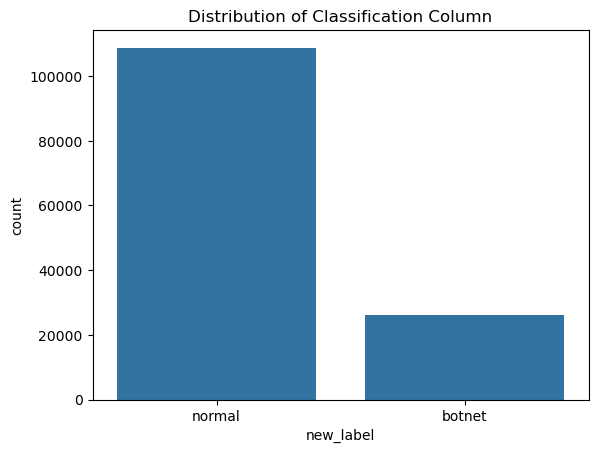

In [50]:
sns.countplot(x='new_label', data=filtered_df)
plt.title('Distribution of Classification Column')
plt.show()

# Here the resulting pair plot shows:

 - Each subplot along the diagonal represents the distribution of a specific feature, with two overlaid histograms or kernel density plots—one for each diagnosis class.
 - Off-diagonal subplots show scatter plots between pairs of features, with points colored according to the diagnosis (M or B).  - These scatter plots help visualize potential patterns or separations between the two diagnosis classes.

In [52]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135041 entries, 8300598 to 13010937
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   StartTime  135041 non-null  object 
 1   Dur        135041 non-null  float64
 2   Protocol   135041 non-null  object 
 3   SrcAddr    135041 non-null  object 
 4   Sport      135041 non-null  object 
 5   Dir        135041 non-null  object 
 6   DstAddr    135041 non-null  object 
 7   Dport      135041 non-null  object 
 8   State      135041 non-null  object 
 9   sTos       135041 non-null  float64
 10  dTos       110791 non-null  float64
 11  TotPkts    135041 non-null  int64  
 12  TotBytes   135041 non-null  int64  
 13  SrcBytes   135041 non-null  int64  
 14  Label      135041 non-null  object 
 15  new_label  135041 non-null  object 
dtypes: float64(3), int64(3), object(10)
memory usage: 17.5+ MB


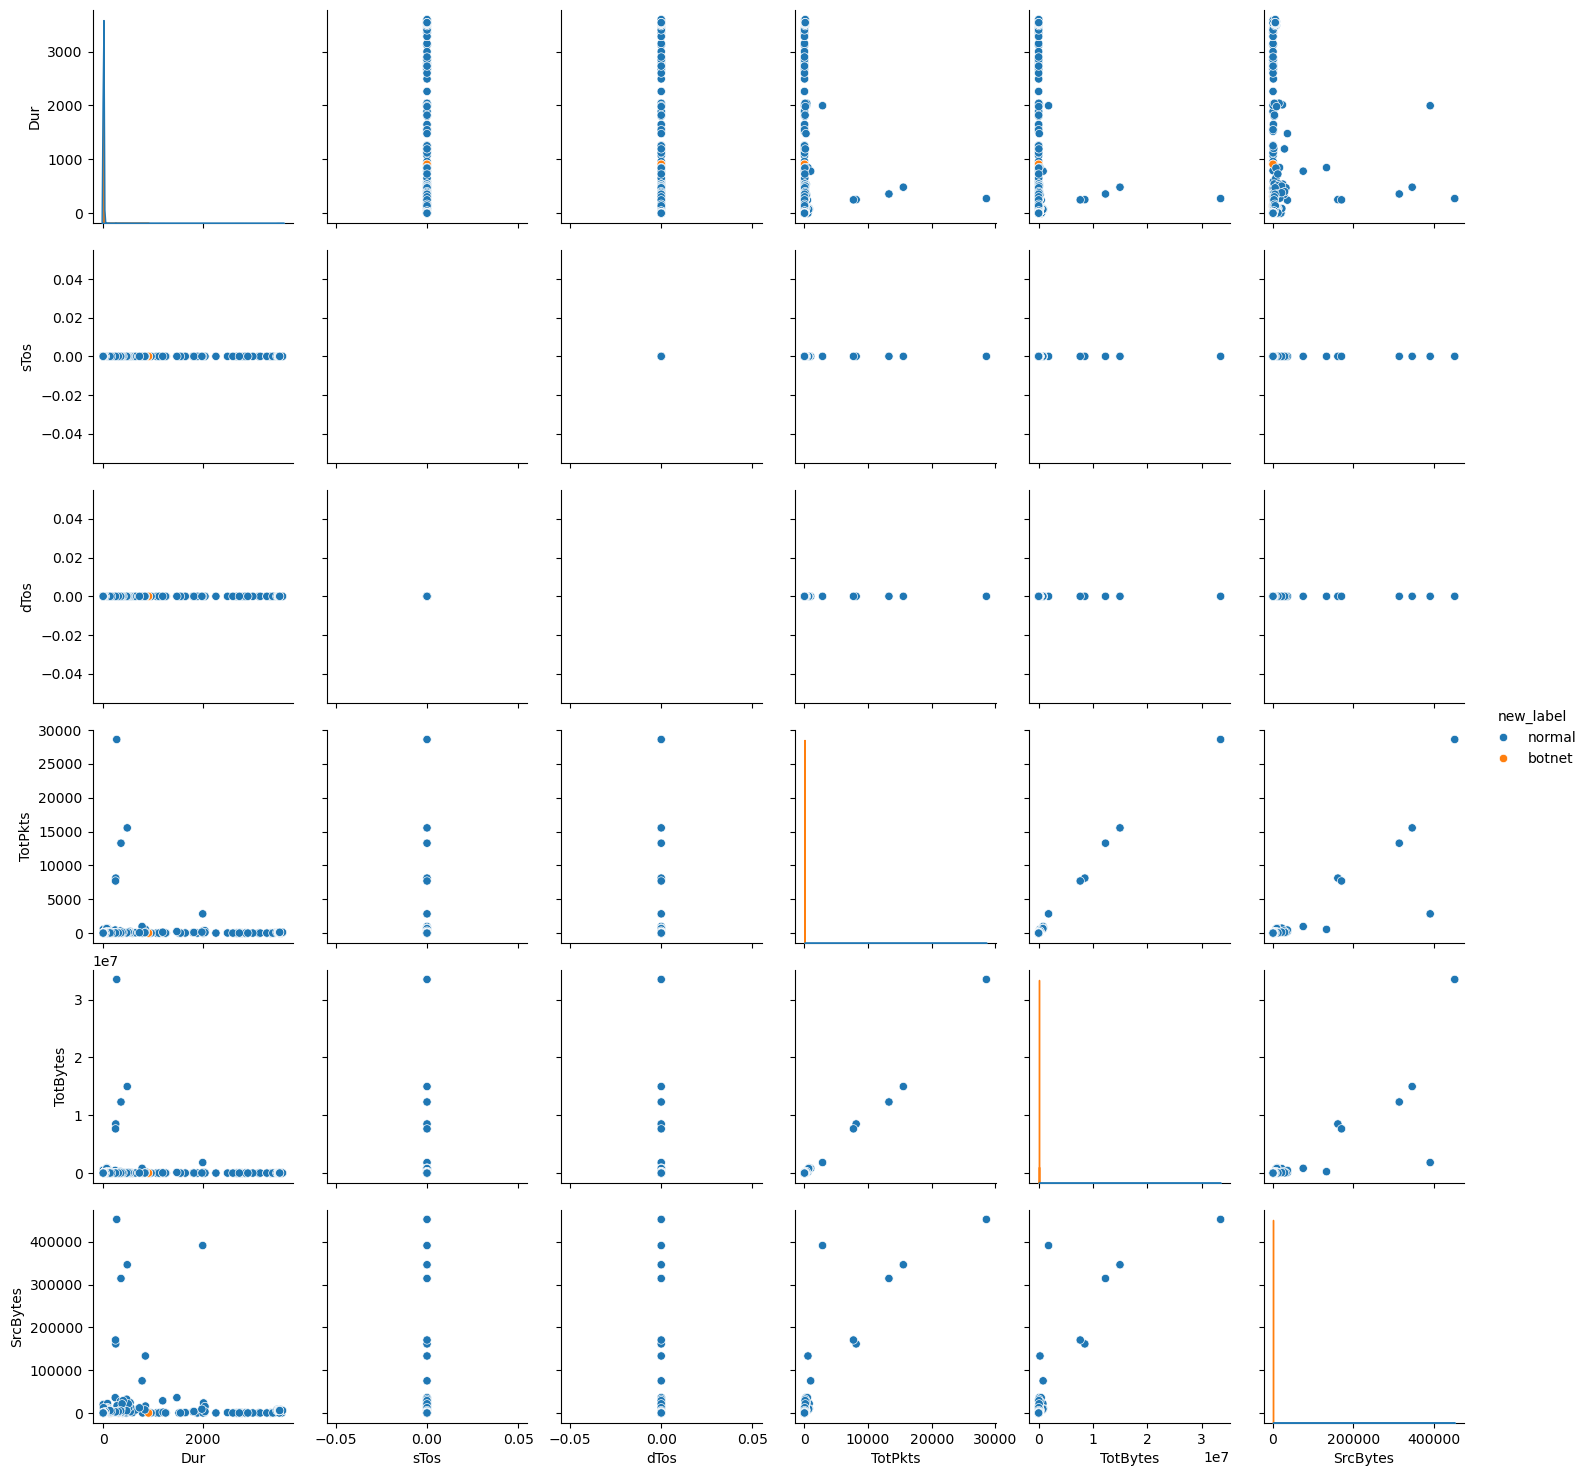

In [54]:
sns.pairplot(filtered_df, hue = 'new_label',
             vars = ['Dur', 'sTos', 'dTos', 'TotPkts', 'TotBytes', 'SrcBytes'])

# !---------------- 3. Data Pre-processing and Validation ---------------------!

"""

 - The data pre-processing step includes: conversion of categorical columns into numerical values which is in our case is "new_label".

 - After that we have applied train_test_split to split the dataset into training and testing data. We have splitted the dataset 
into 80% for training and 20% for testing. 
 - After that we have used standard scaler to stenderdise or normalise our numerical data. This step is mendatory to ensure that our data is on one scale. This is step is used while model training.

"""

In [56]:
filtered_df.head()

,StartTime,Dur,Protocol,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,new_label
8300598,2011/08/12 15:24:03.251544,0.000396,udp,147.32.84.170,43074,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Normal-V44-Stribrek,normal
8300599,2011/08/12 15:24:03.252392,0.000486,udp,147.32.84.170,51423,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Normal-V44-Stribrek,normal
8300600,2011/08/12 15:24:03.253612,0.017916,tcp,147.32.84.170,55222,->,209.85.148.103,80,FSA_FSA,0.0,0.0,6,412,272,flow=From-Normal-V44-Stribrek,normal
8301040,2011/08/12 15:24:13.252581,0.000502,udp,147.32.84.170,57756,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Normal-V44-Stribrek,normal
8301041,2011/08/12 15:24:13.253646,0.000302,udp,147.32.84.170,48640,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Normal-V44-Stribrek,normal


# excluding extra columns from the dataset

In [17]:
dropped_df = filtered_df.drop(['StartTime', 'Label', 'sTos', 'dTos'], 
                              axis=1)

In [18]:
dropped_df

,Dur,Protocol,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,TotBytes,SrcBytes,new_label
8300598,0.000396,udp,147.32.84.170,43074,<->,147.32.80.9,53,CON,2,400,74,normal
8300599,0.000486,udp,147.32.84.170,51423,<->,147.32.80.9,53,CON,2,400,74,normal
8300600,0.017916,tcp,147.32.84.170,55222,->,209.85.148.103,80,FSA_FSA,6,412,272,normal
8301040,0.000502,udp,147.32.84.170,57756,<->,147.32.80.9,53,CON,2,400,74,normal
8301041,0.000302,udp,147.32.84.170,48640,<->,147.32.80.9,53,CON,2,400,74,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
13010334,0.000318,udp,147.32.84.170,38118,<->,147.32.80.9,53,CON,2,280,81,normal
13010335,0.228144,tcp,147.32.84.170,57152,->,195.24.233.55,80,FSPA_FSPA,10,1219,549,normal
13010935,0.000400,udp,147.32.84.170,60186,<->,147.32.80.9,53,CON,2,400,74,normal
13010936,0.000287,udp,147.32.84.170,53954,<->,147.32.80.9,53,CON,2,400,74,normal


# Dropping Null rows

In [20]:
dropped_df = dropped_df.dropna(axis=0)

dropped_df

,Dur,Protocol,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,TotBytes,SrcBytes,new_label
8300598,0.000396,udp,147.32.84.170,43074,<->,147.32.80.9,53,CON,2,400,74,normal
8300599,0.000486,udp,147.32.84.170,51423,<->,147.32.80.9,53,CON,2,400,74,normal
8300600,0.017916,tcp,147.32.84.170,55222,->,209.85.148.103,80,FSA_FSA,6,412,272,normal
8301040,0.000502,udp,147.32.84.170,57756,<->,147.32.80.9,53,CON,2,400,74,normal
8301041,0.000302,udp,147.32.84.170,48640,<->,147.32.80.9,53,CON,2,400,74,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
13010334,0.000318,udp,147.32.84.170,38118,<->,147.32.80.9,53,CON,2,280,81,normal
13010335,0.228144,tcp,147.32.84.170,57152,->,195.24.233.55,80,FSPA_FSPA,10,1219,549,normal
13010935,0.000400,udp,147.32.84.170,60186,<->,147.32.80.9,53,CON,2,400,74,normal
13010936,0.000287,udp,147.32.84.170,53954,<->,147.32.80.9,53,CON,2,400,74,normal


In [102]:
dropped_df.isna().sum()

Dur          0
Protocol     0
SrcAddr      0
Sport        0
Dir          0
DstAddr      0
Dport        0
State        0
TotPkts      0
TotBytes     0
SrcBytes     0
new_label    0
dtype: int64

In [111]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135041 entries, 8300598 to 13010937
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Dur        135041 non-null  float64
 1   Protocol   135041 non-null  object 
 2   SrcAddr    135041 non-null  object 
 3   Sport      135041 non-null  object 
 4   Dir        135041 non-null  object 
 5   DstAddr    135041 non-null  object 
 6   Dport      135041 non-null  object 
 7   State      135041 non-null  object 
 8   TotPkts    135041 non-null  int64  
 9   TotBytes   135041 non-null  int64  
 10  SrcBytes   135041 non-null  int64  
 11  new_label  135041 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 13.4+ MB


# converting those object columns into float which are tends to be float because there values are continous not discrete 

In [113]:
print(dropped_df['Protocol'].value_counts())
print()

print(dropped_df['SrcAddr'].value_counts())
print()

print(dropped_df['Sport'].value_counts())
print()

print(dropped_df['Dir'].value_counts())
print()

print(dropped_df['DstAddr'].value_counts())
print()

print(dropped_df['Dport'].value_counts())
print()

print(dropped_df['State'].value_counts())
print()


Protocol
udp     69907
tcp     65127
icmp        7
Name: count, dtype: int64

SrcAddr
147.32.84.170    108807
147.32.84.165     26234
Name: count, dtype: int64

Sport
57685    50
47328    24
55893    14
45176    14
53735    13
         ..
33568     1
48941     1
44046     1
53078     1
55112     1
Name: count, Length: 31719, dtype: int64

Dir
<->    69906
 ->    65135
Name: count, dtype: int64

DstAddr
147.32.80.9        69907
209.85.148.105      6355
209.85.148.106      6253
195.24.233.55       5255
209.85.148.99       4020
                   ...  
209.130.108.231        1
209.130.75.129         1
209.130.17.63          1
209.129.195.141        1
213.60.175.84          1
Name: count, Length: 26352, dtype: int64

Dport
53        69907
80        32632
22        26234
443        6256
5222          3
0xc413        2
0xbf3a        2
0xbd3a        2
0xf9d0        1
81            1
1935          1
Name: count, dtype: int64

State
CON           69906
FSA_FSA       24352
S_            24242
FS

# Converting categorical variables into encoded variables

In [115]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135041 entries, 8300598 to 13010937
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Dur        135041 non-null  float64
 1   Protocol   135041 non-null  object 
 2   SrcAddr    135041 non-null  object 
 3   Sport      135041 non-null  object 
 4   Dir        135041 non-null  object 
 5   DstAddr    135041 non-null  object 
 6   Dport      135041 non-null  object 
 7   State      135041 non-null  object 
 8   TotPkts    135041 non-null  int64  
 9   TotBytes   135041 non-null  int64  
 10  SrcBytes   135041 non-null  int64  
 11  new_label  135041 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 13.4+ MB


In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assuming df is your dataframe and these are the remaining categorical columns
categorical_columns = ['Protocol', 'SrcAddr', 'Dir', 'DstAddr', 'State', 'Sport', 'Dport']

encoded_df = pd.DataFrame()
encoded_df = dropped_df

# Apply Label Encoding for ordinal columns
label_encoder = LabelEncoder()

encoded_df[categorical_columns[0]] = label_encoder.fit_transform(encoded_df[categorical_columns[0]])
encoded_df[categorical_columns[1]] = label_encoder.fit_transform(encoded_df[categorical_columns[1]])
encoded_df[categorical_columns[2]] = label_encoder.fit_transform(encoded_df[categorical_columns[2]])
encoded_df[categorical_columns[3]] = label_encoder.fit_transform(encoded_df[categorical_columns[3]])
encoded_df[categorical_columns[4]] = label_encoder.fit_transform(encoded_df[categorical_columns[4]])
encoded_df[categorical_columns[5]] = label_encoder.fit_transform(encoded_df[categorical_columns[5]])
encoded_df[categorical_columns[6]] = label_encoder.fit_transform(encoded_df[categorical_columns[6]])




encoded_df

,Dur,Protocol,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,TotBytes,SrcBytes,new_label
8300598,0.000396,2,1,13457,1,4988,8,0,2,400,74,normal
8300599,0.000486,2,1,22323,1,4988,8,0,2,400,74,normal
8300600,0.017916,1,1,26036,0,9298,9,3,6,412,272,normal
8301040,0.000502,2,1,28515,1,4988,8,0,2,400,74,normal
8301041,0.000302,2,1,19455,1,4988,8,0,2,400,74,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
13010334,0.000318,2,1,8099,1,4988,8,0,2,280,81,normal
13010335,0.228144,1,1,27928,0,5013,9,7,10,1219,549,normal
13010935,0.000400,2,1,30889,1,4988,8,0,2,400,74,normal
13010936,0.000287,2,1,24797,1,4988,8,0,2,400,74,normal


In [35]:
encoded_df.Dir.value_counts()

Dir
1    69906
0    65135
Name: count, dtype: int64

# converting target column new_label into numerical labels

In [37]:
encoded_df['new_label'] = label_encoder.fit_transform(encoded_df['new_label'])

encoded_df

,Dur,Protocol,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,TotBytes,SrcBytes,new_label
8300598,0.000396,2,1,13457,1,4988,8,0,2,400,74,1
8300599,0.000486,2,1,22323,1,4988,8,0,2,400,74,1
8300600,0.017916,1,1,26036,0,9298,9,3,6,412,272,1
8301040,0.000502,2,1,28515,1,4988,8,0,2,400,74,1
8301041,0.000302,2,1,19455,1,4988,8,0,2,400,74,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13010334,0.000318,2,1,8099,1,4988,8,0,2,280,81,1
13010335,0.228144,1,1,27928,0,5013,9,7,10,1219,549,1
13010935,0.000400,2,1,30889,1,4988,8,0,2,400,74,1
13010936,0.000287,2,1,24797,1,4988,8,0,2,400,74,1


In [39]:
encoded_df.new_label.value_counts()

new_label
1    108807
0     26234
Name: count, dtype: int64

# Balancing the dataset by taking only 10k sample from the target variable - 'new_label'

In [89]:
min_sample = 2000


balanced_df = dropped_df.groupby('new_label').apply(lambda x: x.sample(min_sample)).reset_index(drop=True)

balanced_df

C:\Users\pc\AppData\Local\Temp\ipykernel_24124\1499931072.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = dropped_df.groupby('new_label').apply(lambda x: x.sample(min_sample)).reset_index(drop=True)


,Dur,Protocol,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,TotBytes,SrcBytes,new_label
0,8.911654,1,0,3528,0,11708,5,20,3,186,186,0
1,9.009951,1,0,1366,0,25250,5,20,3,186,186,0
2,9.012555,1,0,17795,0,24852,5,20,3,186,186,0
3,8.912706,1,0,18956,0,9170,5,20,3,186,186,0
4,9.011438,1,0,1868,0,25778,5,20,3,186,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.000372,2,1,21266,1,4988,8,0,2,244,81,1
3996,0.018226,1,1,28510,0,9298,9,3,6,412,272,1
3997,0.000311,2,1,10843,1,4988,8,0,2,280,81,1
3998,0.017796,1,1,21231,0,9300,9,3,7,478,272,1


In [91]:
balanced_df.new_label.value_counts()

new_label
0    2000
1    2000
Name: count, dtype: int64

# !-------------------- 4 - feature extractrion and data split ----------------!

In [93]:
# Define X (features) and y (target)
X = balanced_df.drop('new_label', axis=1)  # Drop the new_label column to get the features
y = balanced_df['new_label']  # Target variable 'new_label'


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standerdizing feature

In [96]:
# Standerdizing feature for Supervised Learning phase
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Standerdizing feature for UN-Supervised Learning phase
X_scaled_USP = scaler.transform(X)

# Train a RandomForestClassifier model to get relevent features

In [98]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


# Get feature importances
importances = model.feature_importances_

print(importances)

[1.33640210e-01 4.61999934e-03 2.91643789e-01 1.61784135e-04
 2.78883453e-02 5.23491986e-03 2.25290560e-01 2.22375205e-01
 4.82803349e-03 7.29073312e-02 1.14098217e-02]


# Create a DataFrame to display feature importances alongside their column names

Feature Importance:
      Feature  Importance
2    SrcAddr    0.291644
6      Dport    0.225291
7      State    0.222375
0        Dur    0.133640
9   TotBytes    0.072907
4        Dir    0.027888
10  SrcBytes    0.011410
5    DstAddr    0.005235
8    TotPkts    0.004828
1   Protocol    0.004620
3      Sport    0.000162


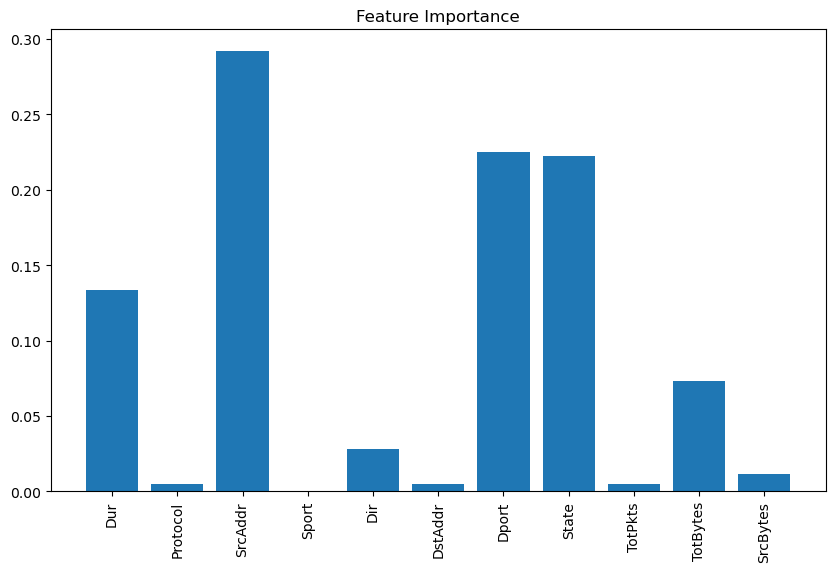

In [102]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})


# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance_df)


# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(X.columns, importances)
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.show()

# Select features and creating new X dataset by selecting columns as per the feature importance

In [105]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(model, threshold="mean", prefit=True)  # Only features with importance above mean are kept
X_selected = selector.transform(X)  # This will give the transformed dataset with selected features

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

print("Selected Features:\n", selected_features)

Selected Features:
 Index(['Dur', 'SrcAddr', 'Dport', 'State'], dtype='object')


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [107]:
X_sel_features = X[selected_features]

X_sel_features

,Dur,SrcAddr,Dport,State
0,8.911654,0,5,20
1,9.009951,0,5,20
2,9.012555,0,5,20
3,8.912706,0,5,20
4,9.011438,0,5,20
...,...,...,...,...
3995,0.000372,1,8,0
3996,0.018226,1,9,3
3997,0.000311,1,8,0
3998,0.017796,1,9,3


# Splitting the dataset for selected features and doing Scaling of selected features

In [109]:
# Split data into training and test sets
X_train_sel_features, X_test_sel_features, y_train_sel_features, y_test_sel_features = train_test_split(
    X_sel_features, y, test_size=0.2, random_state=42
)

In [111]:
X_train

,Dur,Protocol,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,TotBytes,SrcBytes
3994,0.000347,2,1,14385,1,4988,8,0,2,400,74
423,8.912334,1,0,12404,0,16475,5,20,3,186,186
2991,0.018211,1,1,29568,0,9301,9,3,6,412,272
1221,9.013186,1,0,386,0,20390,5,20,3,186,186
506,9.015538,1,0,6039,0,10795,5,20,3,186,186
...,...,...,...,...,...,...,...,...,...,...,...
1130,8.912413,1,0,6136,0,7283,5,20,3,186,186
1294,9.011954,1,0,16924,0,20963,5,20,3,186,186
860,2.790443,1,0,11400,0,23125,5,23,6,366,186
3507,0.220738,1,1,7616,0,5012,9,7,10,1219,549


In [113]:
X_train_sel_features

,Dur,SrcAddr,Dport,State
3994,0.000347,1,8,0
423,8.912334,0,5,20
2991,0.018211,1,9,3
1221,9.013186,0,5,20
506,9.015538,0,5,20
...,...,...,...,...
1130,8.912413,0,5,20
1294,9.011954,0,5,20
860,2.790443,0,5,23
3507,0.220738,1,9,7


In [115]:
y_train

3994    1
423     0
2991    1
1221    0
506     0
       ..
1130    0
1294    0
860     0
3507    1
3174    1
Name: new_label, Length: 3200, dtype: int32

In [117]:
# Standerdizing feature for Supervised Learning phase
scaler_sel_features = StandardScaler()

X_train_scaled_sel_features = scaler_sel_features.fit_transform(X_train_sel_features)
X_test_scaled_sel_features = scaler_sel_features.transform(X_test_sel_features)

# Standerdizing feature for UN-Supervised Learning phase
X_scaled_USP_sel_features = scaler_sel_features.transform(X_sel_features)

# ! -------- 5 - Un-Supervised Learning Phase -- Clustering and PCA -------------!
# Also Calculating silhouette score and Doing Visualisation

# Before feature importance

Silhouette Score - K-means: 0.5504261393555747


Text(0.5, 1.0, 'K-means Clustering')

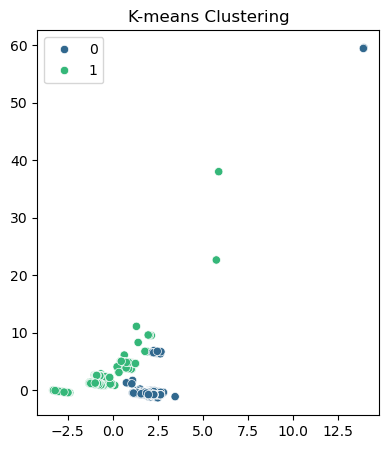

In [119]:
# Doing Clustering using K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled_USP)

# Using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_USP)

# Silhouette Score
silhouette_kmeans = silhouette_score(X_scaled_USP, kmeans_labels)
print(f'Silhouette Score - K-means: {silhouette_kmeans}')

# Visualizing the clusters in reduced dimensionality using PCA
# K-means
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', legend='full')
plt.title('K-means Clustering')

# After feature importance

Silhouette Score - K-means: 0.9094560641299635


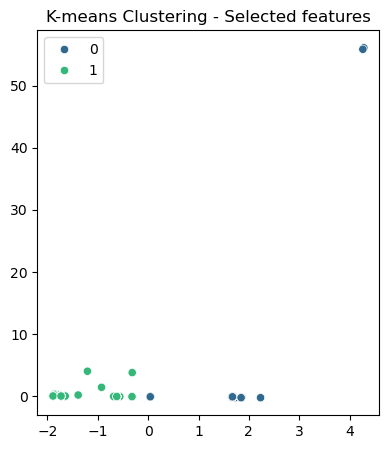

In [121]:
# Doing Clustering using K-means
kmeans_sel_features = KMeans(n_clusters=2, random_state=42)
kmeans_labels_sel_features = kmeans.fit_predict(X_scaled_USP_sel_features)

# Using PCA for dimensionality reduction
pca_sel_features = PCA(n_components=2)
X_pca_sel_features = pca_sel_features.fit_transform(X_scaled_USP_sel_features)

# Silhouette Score
silhouette_kmeans_sel_features = silhouette_score(X_scaled_USP_sel_features, kmeans_labels_sel_features)
print(f'Silhouette Score - K-means: {silhouette_kmeans_sel_features}')

# Visualizing the clusters in reduced dimensionality using PCA
# K-means
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_pca_sel_features[:, 0], y=X_pca_sel_features[:, 1], hue=kmeans_labels_sel_features, palette='viridis', legend='full')
plt.title('K-means Clustering - Selected features')



# # Clustering using Agglomerative Hierarchical Clustering
# hierarchical = AgglomerativeClustering(n_clusters=4)
# hierarchical_labels = hierarchical.fit_predict(X_scaled_USP)

# # Clustering using DBScan
# dbscan = DBSCAN(eps=1.5, min_samples=5)
# dbscan_labels = dbscan.fit_predict(X_scaled_USP)


# # Hierarchical
# plt.subplot(1, 3, 2)
# sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hierarchical_labels, palette='viridis', legend='full')
# plt.title('Hierarchical Clustering')

# # DBScan
# plt.subplot(1, 3, 3)
# sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='viridis', legend='full')
# plt.title('DBScan Clustering')

plt.show()

# !-------------- 6. Supervised Model Training and Validation ------------------!

"""

We have taken 4 models: Random Forest Classifier, Logistic Regression, Support Vector Machine Classifier, Naive Bayes Classifier to get the best accuracy out of these 4 models. 

"""

# Before feature importance

In [124]:
# Random Forest Classifier
RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_train_scaled, y_train)
RF_model_pred = RF_model.predict(X_test_scaled)


# Logistic Regression Model
LR_model = LogisticRegression(random_state=42)
LR_model.fit(X_train_scaled, y_train)
LR_model_pred = LR_model.predict(X_test_scaled)


# Support Vector Machine Classifier
SVC_model = SVC(random_state=42)
SVC_model.fit(X_train_scaled, y_train)
SVC_model_pred = SVC_model.predict(X_test_scaled)


# Naive Bayes Classifier
NB_model = GaussianNB()
NB_model.fit(X_train_scaled, y_train)
NB_model_pred = NB_model.predict(X_test_scaled)

In [125]:
print("Random Forest: " + f"{RF_model_pred[0]}")
print("Logistic Regression: " + f"{LR_model_pred[0]}")
print("SVC: " + f"{SVC_model_pred[0]}")
print("NB: " + f"{NB_model_pred[0]}")

Random Forest: 0
Logistic Regression: 0
SVC: 0
NB: 0


# After feature importance

In [128]:
# Random Forest Classifier
RF_model_sf = RandomForestClassifier(random_state=42)
RF_model_sf.fit(X_train_scaled_sel_features, y_train)
RF_model_pred_sf = RF_model_sf.predict(X_test_scaled_sel_features)


# Logistic Regression Model
LR_model_sf = LogisticRegression(random_state=42)
LR_model_sf.fit(X_train_scaled_sel_features, y_train)
LR_model_pred_sf = LR_model_sf.predict(X_test_scaled_sel_features)


# Support Vector Machine Classifier
SVC_model_sf = SVC(random_state=42)
SVC_model_sf.fit(X_train_scaled_sel_features, y_train)
SVC_model_pred_sf = SVC_model_sf.predict(X_test_scaled_sel_features)


# Naive Bayes Classifier
NB_model_sf = GaussianNB()
NB_model_sf.fit(X_train_scaled_sel_features, y_train)
NB_model_pred_sf = NB_model_sf.predict(X_test_scaled_sel_features)

In [129]:
print("Random Forest: " + f"{RF_model_pred_sf[0]}")
print("Logistic Regression: " + f"{LR_model_pred_sf[0]}")
print("SVC: " + f"{SVC_model_pred_sf[0]}")
print("NB: " + f"{NB_model_pred_sf[0]}")

Random Forest: 0
Logistic Regression: 0
SVC: 0
NB: 0


# !--------------- 7 Model Evaluation ------------------!

# Before feature selection

In [132]:
# Accuracy score for our three models
RF_accuracy = accuracy_score(y_test, RF_model_pred)
LR_accuracy = accuracy_score(y_test, LR_model_pred)
SVC_accuracy = accuracy_score(y_test, SVC_model_pred)
NB_accuracy = accuracy_score(y_test, NB_model_pred)


# Confusion metrix and classification report for out three models
RF_conf_matrix = confusion_matrix(y_test, RF_model_pred)
RF_class_rep = classification_report(y_test, RF_model_pred)

LR_conf_matrix = confusion_matrix(y_test, LR_model_pred)
LR_class_rep = classification_report(y_test, LR_model_pred)

SVC_conf_matrix = confusion_matrix(y_test, SVC_model_pred)
SVC_class_rep = classification_report(y_test, SVC_model_pred)

NB_conf_matrix = confusion_matrix(y_test, NB_model_pred)
NB_class_rep = classification_report(y_test, NB_model_pred)

# After feature selection

In [135]:
# Accuracy score for our three models
RF_accuracy_sf = accuracy_score(y_test, RF_model_pred_sf)
LR_accuracy_sf = accuracy_score(y_test, LR_model_pred_sf)
SVC_accuracy_sf = accuracy_score(y_test, SVC_model_pred_sf)
NB_accuracy_sf = accuracy_score(y_test, NB_model_pred_sf)


# Confusion metrix and classification report for out three models
RF_conf_matrix_sf = confusion_matrix(y_test, RF_model_pred_sf)
RF_class_rep_sf = classification_report(y_test, RF_model_pred_sf)

LR_conf_matrix_sf = confusion_matrix(y_test, LR_model_pred_sf)
LR_class_rep_sf = classification_report(y_test, LR_model_pred_sf)

SVC_conf_matrix_sf = confusion_matrix(y_test, SVC_model_pred_sf)
SVC_class_rep_sf = classification_report(y_test, SVC_model_pred_sf)

NB_conf_matrix_sf = confusion_matrix(y_test, NB_model_pred_sf)
NB_class_rep_sf = classification_report(y_test, NB_model_pred_sf)

# !---------------- 8. Output and highlight of the best model -------------------!

"""

Evaluating the best output result(Accuracy Score) from our 3 models by creating a sample dataframe which has a model names and the Score of each model. 

We have got the result by checking the max value of accuracy of the model

After that we have plotted prediction on test and training data with respect to the original values. 

"""

# Before feature selection

In [137]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'SVC', 'NB'],
    'AUC (Accuracy Score)': [RF_accuracy, LR_accuracy, SVC_accuracy, NB_accuracy]
})

best_model = results.loc[results['AUC (Accuracy Score)'].idxmax()]

# Printing the results
print("Results before feature selection:\n", results)
print("\nBest Model:\n", best_model)

Results before feature selection:
                  Model  AUC (Accuracy Score)
0        Random Forest                   1.0
1  Logistic Regression                   1.0
2                  SVC                   1.0
3                   NB                   1.0

Best Model:
 Model                   Random Forest
AUC (Accuracy Score)              1.0
Name: 0, dtype: object


# After feature selection

In [141]:
results_sf = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'SVC', 'NB'],
    'AUC (Accuracy Score)': [RF_accuracy_sf, LR_accuracy_sf, SVC_accuracy_sf, NB_accuracy_sf]
})

best_model_sf = results_sf.loc[results_sf['AUC (Accuracy Score)'].idxmax()]

# Printing the results
print("Results after feature selection:\n", results_sf)
print("\nBest Model:\n", best_model_sf)

Results after feature selection:
                  Model  AUC (Accuracy Score)
0        Random Forest                   1.0
1  Logistic Regression                   1.0
2                  SVC                   1.0
3                   NB                   1.0

Best Model:
 Model                   Random Forest
AUC (Accuracy Score)              1.0
Name: 0, dtype: object


# Scatter plot to visualise the prediction on test data of the best model which is in our case is Random Forest Classifier

# Scatter Plot

In [183]:
print(y_test[:5])
print(RF_model_pred[:5])

10650    1
2041     0
8668     0
1114     0
13902    1
Name: new_label, dtype: int32
[1 0 0 0 1]


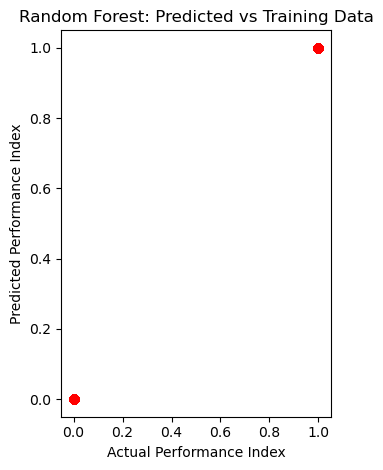

In [187]:
# Scatter plot for Support Vector Machine Classifier on Test Data
plt.subplot(1, 2, 2)
plt.scatter(y_test, RF_model_pred, color='red')
plt.title('Random Forest: Predicted vs Training Data')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')

plt.tight_layout()
plt.show()

# Confusion Metrix and Classification report of out best model - Random Forest

In [190]:
print(f'Random Forest Model')
print(f'Accuracy: {RF_accuracy}')
print(f'Classification Report:\n{RF_class_rep}')
print('-' * 50)

Random Forest Model
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2019
           1       1.00      1.00      1.00      1981

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

--------------------------------------------------


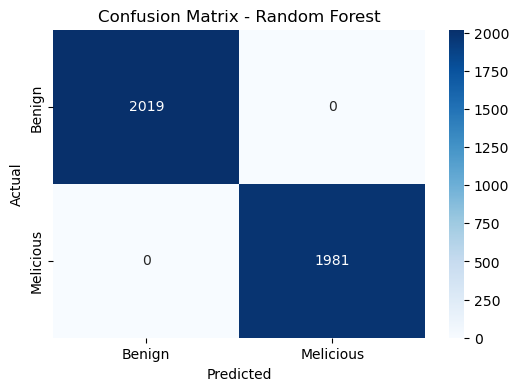

In [192]:
plt.figure(figsize=(6, 4))
sns.heatmap(RF_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Melicious'], yticklabels=['Benign', 'Melicious'])
plt.title(f'Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Metrix and Classification report of other three

In [228]:
# Logistic Regression
print(f'Logistic Regression Model')
print(f'Accuracy: {LR_accuracy}')
print(f'Classification Report:\n{LR_class_rep}')
print('-' * 50)

# SVC
print(f'Support Vector Model')
print(f'Accuracy: {SVC_accuracy}')
print(f'Classification Report:\n{SVC_class_rep}')
print('-' * 50)


# NB
print(f'Naive Bayes Model')
print(f'Accuracy: {NB_accuracy}')
print(f'Classification Report:\n{NB_class_rep}')
print('-' * 50)

Logistic Regression Model
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2019
           1       1.00      1.00      1.00      1981

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

--------------------------------------------------
Support Vector Model
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2019
           1       1.00      1.00      1.00      1981

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

--------------------------------------------------
Naive Bayes Model
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0 

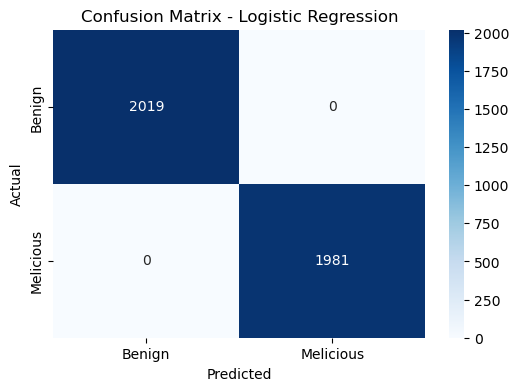

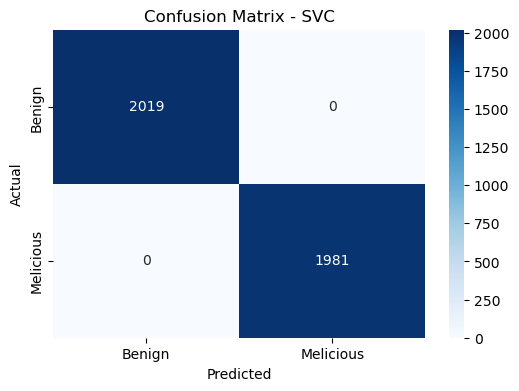

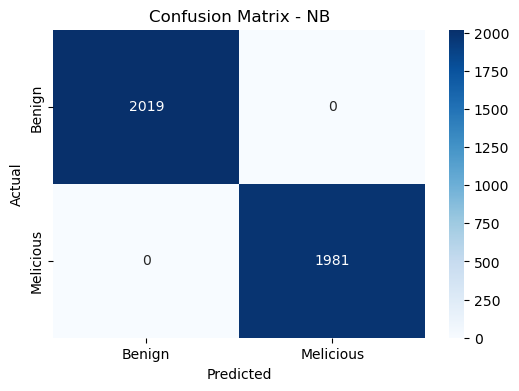

In [199]:
# Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(LR_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Melicious'], yticklabels=['Benign', 'Melicious'])
plt.title(f'Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVC
plt.figure(figsize=(6, 4))
sns.heatmap(SVC_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Melicious'], yticklabels=['Benign', 'Melicious'])
plt.title(f'Confusion Matrix - SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# NB
plt.figure(figsize=(6, 4))
sns.heatmap(NB_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Melicious'], yticklabels=['Benign', 'Melicious'])
plt.title(f'Confusion Matrix - NB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# !------------------------- Model Validation ---------------------------!
 - Calculating Accuracy Score and Plotting Accuracy Curve for each of the model by using Cross validation technique.
 - Reason for doing this is to validate our model performance

In [143]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np 


# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [145]:
scaler_X = StandardScaler()

scaled_X = scaler_X.fit_transform(X_sel_features)

# Random Forest Model

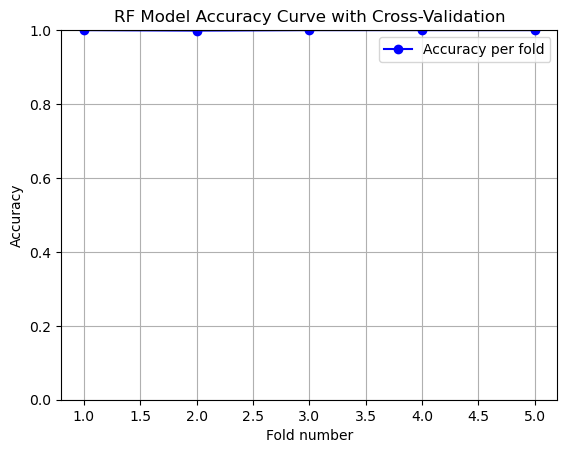


Accuracy Score: [1.0, 0.99875, 1.0, 1.0, 1.0]
Average Accuracy: 0.9998


In [147]:
# Store accuracy for each fold
accuracy_scores_rf_cv = []

# Iterate over each fold
for train_index, test_index in kf.split(scaled_X):
    X_train_rf_cv, X_test_rf_cv = scaled_X[train_index], scaled_X[test_index]
    y_train_rf_cv, y_test_rf_cv = y[train_index], y[test_index]
    
    # Train the model
    RF_model_sf.fit(X_train_rf_cv, y_train_rf_cv)
    
    # Predict on test data
    y_pred_rf_cv = RF_model_sf.predict(X_test_rf_cv)
    
    # Calculate accuracy
    accuracy_rf_cv = accuracy_score(y_test_rf_cv, y_pred_rf_cv)
    accuracy_scores_rf_cv.append(accuracy_rf_cv)

# Plot the accuracy curve
plt.plot(range(1, len(accuracy_scores_rf_cv) + 1), accuracy_scores_rf_cv, marker='o', linestyle='-', color='b', label="Accuracy per fold")
plt.title('RF Model Accuracy Curve with Cross-Validation')
plt.xlabel('Fold number')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Accuracy ranges from 0 to 1
plt.grid(True)
plt.legend()
plt.show()

print()
# Print the accuracy Score
print(f'Accuracy Score: {accuracy_scores_rf_cv}')


# Print the average accuracy across all folds
print(f'Average Accuracy: {np.mean(accuracy_scores_rf_cv):.4f}')


# SVC

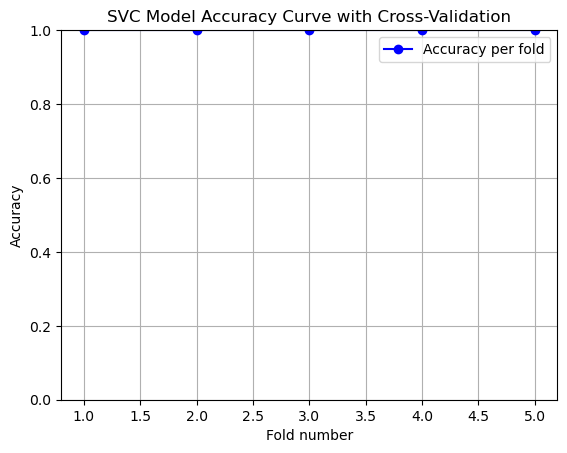


Accuracy Score: [1.0, 1.0, 1.0, 1.0, 1.0]
Average Accuracy: 1.0000


In [149]:
# Store accuracy for each fold
accuracy_scores_svc_cv = []

# Iterate over each fold
for train_index, test_index in kf.split(scaled_X):
    X_train_svc_cv, X_test_svc_cv = scaled_X[train_index], scaled_X[test_index]
    y_train_svc_cv, y_test_svc_cv = y[train_index], y[test_index]
    
    # Train the model
    SVC_model_sf.fit(X_train_svc_cv, y_train_svc_cv)
    
    # Predict on test data
    y_pred_svc_cv = SVC_model_sf.predict(X_test_svc_cv)
    
    # Calculate accuracy
    accuracy_svc_cv = accuracy_score(y_test_svc_cv, y_pred_svc_cv)
    accuracy_scores_svc_cv.append(accuracy_svc_cv)

# Plot the accuracy curve
plt.plot(range(1, len(accuracy_scores_svc_cv) + 1), accuracy_scores_svc_cv, marker='o', linestyle='-', color='b', label="Accuracy per fold")
plt.title('SVC Model Accuracy Curve with Cross-Validation')
plt.xlabel('Fold number')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Accuracy ranges from 0 to 1
plt.grid(True)
plt.legend()
plt.show()

print()
# Print the accuracy Score
print(f'Accuracy Score: {accuracy_scores_svc_cv}')


# Print the average accuracy across all folds
print(f'Average Accuracy: {np.mean(accuracy_scores_svc_cv):.4f}')


# Logistic Regression 

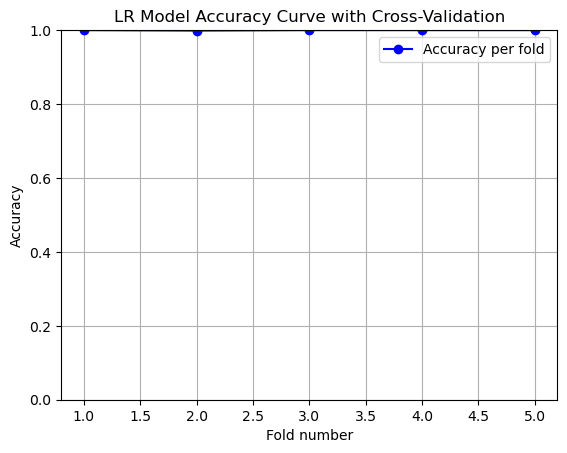


Accuracy Score: [1.0, 0.99875, 1.0, 1.0, 1.0]
Average Accuracy: 0.9998


In [151]:
# Store accuracy for each fold
accuracy_scores_lr_cv = []

# Iterate over each fold
for train_index, test_index in kf.split(scaled_X):
    X_train_lr_cv, X_test_lr_cv = scaled_X[train_index], scaled_X[test_index]
    y_train_lr_cv, y_test_lr_cv = y[train_index], y[test_index]
    
    # Train the model
    LR_model_sf.fit(X_train_lr_cv, y_train_lr_cv)
    
    # Predict on test data
    y_pred_lr_cv = LR_model_sf.predict(X_test_lr_cv)
    
    # Calculate accuracy
    accuracy_lr_cv = accuracy_score(y_test_lr_cv, y_pred_lr_cv)
    accuracy_scores_lr_cv.append(accuracy_lr_cv)

# Plot the accuracy curve
plt.plot(range(1, len(accuracy_scores_lr_cv) + 1), accuracy_scores_lr_cv, marker='o', linestyle='-', color='b', label="Accuracy per fold")
plt.title('LR Model Accuracy Curve with Cross-Validation')
plt.xlabel('Fold number')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Accuracy ranges from 0 to 1
plt.grid(True)
plt.legend()
plt.show()

print()
# Print the accuracy Score
print(f'Accuracy Score: {accuracy_scores_lr_cv}')


# Print the average accuracy across all folds
print(f'Average Accuracy: {np.mean(accuracy_scores_lr_cv):.4f}')


# NB 

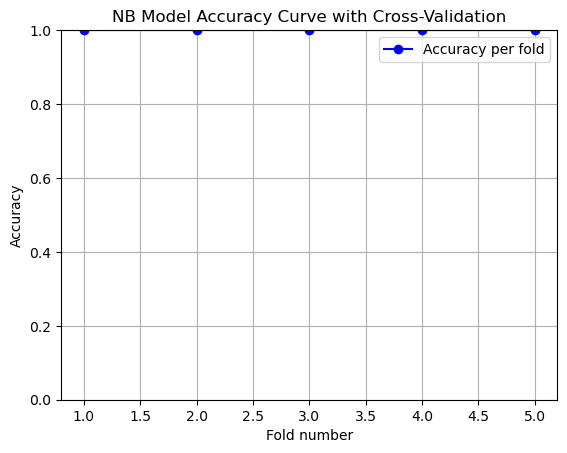


Accuracy Score: [1.0, 1.0, 1.0, 1.0, 1.0]
Average Accuracy: 1.0000


In [153]:
# Store accuracy for each fold
accuracy_scores_nb_cv = []

# Iterate over each fold
for train_index, test_index in kf.split(scaled_X):
    X_train_nb_cv, X_test_nb_cv = scaled_X[train_index], scaled_X[test_index]
    y_train_nb_cv, y_test_nb_cv = y[train_index], y[test_index]
    
    # Train the model
    NB_model_sf.fit(X_train_nb_cv, y_train_nb_cv)
    
    # Predict on test data
    y_pred_nb_cv = NB_model_sf.predict(X_test_nb_cv)
    
    # Calculate accuracy
    accuracy_nb_cv = accuracy_score(y_test_svc_cv, y_pred_svc_cv)
    accuracy_scores_nb_cv.append(accuracy_nb_cv)

# Plot the accuracy curve
plt.plot(range(1, len(accuracy_scores_nb_cv) + 1), accuracy_scores_nb_cv, marker='o', linestyle='-', color='b', label="Accuracy per fold")
plt.title('NB Model Accuracy Curve with Cross-Validation')
plt.xlabel('Fold number')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Accuracy ranges from 0 to 1
plt.grid(True)
plt.legend()
plt.show()

print()
# Print the accuracy Score
print(f'Accuracy Score: {accuracy_scores_nb_cv}')


# Print the average accuracy across all folds
print(f'Average Accuracy: {np.mean(accuracy_scores_nb_cv):.4f}')
